## Shalma Wegsman

# Final Project: The Ideal Tour of Chicago

For my project, I am implementing a genetic algorithm to solve the traveling salesmam problem. In this problem, a salesman must find the shortest possible route to travel to a set of "cities", stopping at each exactly once. Once that algorithm is up and running, we can apply it to Chicago neighborhoods to curate the ideal Chicago tour - perfect for any ambitious friend in town for a day!

## Part 1: Building the algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random as rng

We build the genetic algorithm that takes the location of cities as an input, so that we can test it on a set of randomly placed cities.

[[ 2.49354598 36.21268641]
 [ 2.1340867  11.22783097]
 [24.21897947  5.56041157]
 [45.61000489 13.33091582]
 [41.69546564 35.04275974]]


Text(0.5, 1.0, 'Map of Random Cities')

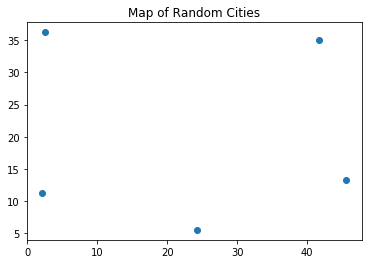

In [2]:
#We generate the locations of N cities on an M x M plane

#Inputs
N = 5
M = 50

#Generate locations (x,y) of cities
cities = np.array(rng.uniform(0,M,size=2*N))
cities = cities.reshape(N,2)
print(cities)

#Plot to see how they look
plt.scatter(cities[:,0],cities[:,1])
plt.title('Map of Random Cities')

In [3]:
#calculates the distance between any two cities
def distance(city_1, city_2):
    dist = np.sqrt( (city_1[0] - city_2[0])**2 + (city_1[1] - city_2[1])**2 )
    return(dist)

In [4]:
#defines an initial population of travelers and gives them random paths
#every path will have to start and end at the origin city
def initial_travelers(cities,N,trav=50): 
    origin = cities[0,:] 
    population = []
    for x in range(trav):
        path = [i for i in range(1,N)]
        rng.shuffle(path)
        path.insert(0,0) 
        population.append(path)
    return(population)

#some travellers may have the same path

initial_travelers(cities, N, trav=10)

[[0, 3, 1, 4, 2],
 [0, 1, 4, 3, 2],
 [0, 1, 3, 2, 4],
 [0, 2, 3, 4, 1],
 [0, 2, 3, 4, 1],
 [0, 3, 1, 4, 2],
 [0, 3, 4, 1, 2],
 [0, 3, 2, 4, 1],
 [0, 3, 1, 2, 4],
 [0, 3, 4, 1, 2]]

In [5]:
# calculate the fitness of each path
# we calculate the total distance of the path, and then invert it to get fitness
def fitness_calc(cities,population,N):
    fitness = []
    for x in population:
        path = x
        dist = 0
        for i in range(len(path)-2):
            dist = dist + distance( cities[path[i],:], cities[path[i+1],:] )
        dist = dist + distance(cities[0,:],cities[path[N-1],:])
        fitness.append(1/dist)
    plt.hist(fitness)
    return(fitness)

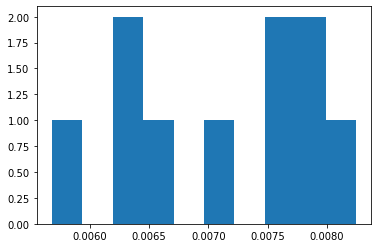

In [6]:
# we perform "evolution" by matching the most "fit" travelers from the population 
# qnd combining their paths to create a new population
def evolution(population,fitness,N,trav,mutation_rate=0.05):
    new_paths = []
    fitness_old = fitness
    while len(new_paths) < len(population):
        k = np.argmax(fitness_old)
        parent_1 = population[k]
        fitness_old.remove(fitness_old[k])
        k = np.argmax(fitness_old)
        parent_2 = population[k]
        fitness_old.remove(fitness_old[k])
        for m in range(4):
            child = []
            n = rng.randint(1,N) #how many "genes" from parent 1
            if n == (N-1):
                l = 1
            else:
                l = rng.randint(1,N-n) #where in parent 1's route to take them from
            child.append(0)
            for j in range(n):
                child.append(parent_1[l+j])
            for p in parent_2:
                if p not in child:
                    child.append(p)   
# "mutate" some paths with some small probability:
            r = rng.random()
            if r < mutation_rate:
                s = rng.randint(1,N-2)
                child[s], child[s+1] = child[s], child[s+1]
            new_paths.append(child)
            
            
    return(new_paths)

pop = initial_travelers(cities, N, trav=10)
fit = fitness_calc(cities,pop,N)

In [7]:
#Finally, we put this all together to perform the gentetic algorithm

def salesman(cities,N,trav=50,mutation_rate=0.05,iterations=100):
    population = initial_travelers(cities, N, trav=trav)
    fitness = fitness_calc(cities,population,N)
    save_fit = []
    for x in range(iterations):
        population = evolution(population,fitness,N,trav,mutation_rate=0.05)
        fitness = fitness_calc(cities,population,N)
        k = np.argmax(fitness)
        save_fit.append(fitness[k])
        plt.close()
    k = np.argmax(fitness)
    return(population[k],save_fit)

In [8]:
salesman(cities,N)[0]

[0, 2, 3, 4, 1]

Let's try this all out and see what it looks like!

In [73]:
#inputs
N = 10
M = 100

#Generate locations (x,y) of cities
cities = np.array(rng.uniform(0,M,size=2*N))
cities = cities.reshape(N,2)

#print(cities)

# find the shortest path
answer = salesman(cities,N,iterations=100,mutation_rate=-.1)

result = answer[0]
print(result)

fitness = answer[1]

[0, 3, 7, 9, 5, 1, 6, 8, 2, 4]


Text(0.5, 0, 'Number of Iterations')

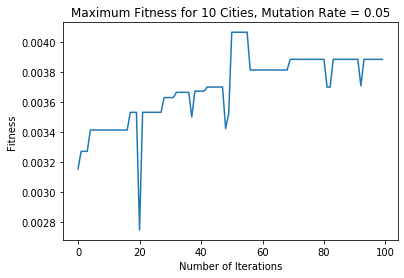

In [74]:
# let's plot how the maximum fitness changes over time
#print(fitness)

x = []
for i in range(len(fitness)):
    x.append(i)

fig = plt.figure()
ax = fig.add_subplot(111)    
plt.plot(x,fitness)
plt.title('Maximum Fitness for 10 Cities, Mutation Rate = 0.05')
plt.ylabel('Fitness')
plt.xlabel('Number of Iterations')
#fig.savefig('fitness_random10_mr0.1.eps')

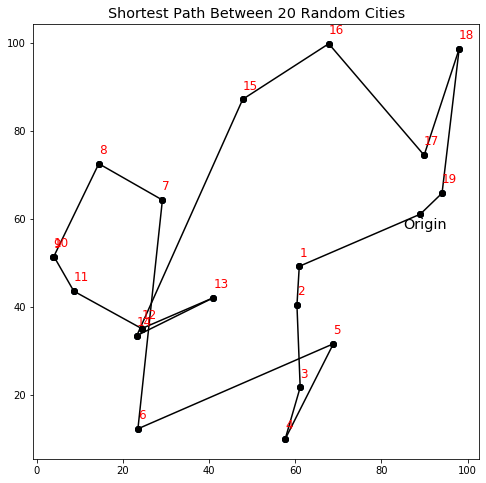

In [61]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

#Plot the cities
plt.scatter(cities[:,0],cities[:,1])
plt.title('Shortest Path Between 20 Random Cities',fontsize='x-large')
plt.annotate('Origin', (cities[0,0],cities[0,1]),textcoords="offset points", xytext=(5,-15), ha='center',fontsize='x-large')

#draw lines showing the ideal path!
for i in range(len(result)-1):
    k = result[i]
    kplus = result[i+1]
    plt.plot([cities[k,0],cities[kplus,0]],[cities[k,1],cities[kplus,1]],'ko-')
    plt.annotate(i+1,(cities[kplus,0],cities[kplus,1]),textcoords="offset points", xytext=(0,10), ha='left',fontsize='large',color='red')
k = result[len(result)-1]
kplus = result[0]
plt.plot([cities[k,0],cities[kplus,0]],[cities[k,1],cities[kplus,1]],'ko-')
#plt.ylim([-4,105])
fig.savefig('example_random20_new.png')
plt.show()

Let's see how the fitness changes are impacted by mutation rate and population size.

In [75]:
# We want to use the same set of cities to test each parameter
#inputs
N = 10
M = 100

#Generate locations (x,y) of cities
cities = np.array(rng.uniform(0,M,size=2*N))
cities = cities.reshape(N,2)

In [143]:
#to reduce noise, we take an average for each
answers = []
for x in range(10):
    sales = salesman(cities,N,iterations=100,mutation_rate=0)
    answers.append(sales[1])
array_0 = np.array(answers)

avg_0 = []
for j in range(len(array_0[0])):
    summ = 0
    for i in range(len(array_0)):
        summ = summ + array_0[i][j]
    avg_0.append(summ/10)
    

answers = []
for x in range(10):
    sales = salesman(cities,N,iterations=100,mutation_rate=0.05)
    answers.append(sales[1])
array_005 = np.array(answers)

avg_005 = []
for j in range(len(array_005[0])):
    summ = 0
    for i in range(len(array_005)):
        summ = summ + array_005[i][j]
    avg_005.append(summ/10)


answers = []
for x in range(10):
    sales = salesman(cities,N,iterations=100,mutation_rate=0.1)
    answers.append(sales[1])
array_01 = np.array(answers)

avg_01 = []
for j in range(len(array_01[0])):
    summ = 0
    for i in range(len(array_01)):
        summ = summ + array_01[i][j]
    avg_01.append(summ/10)

    
answers = []
for x in range(10):
    sales = salesman(cities,N,iterations=100,mutation_rate=0.2)
    answers.append(sales[1])
array_02 = np.array(answers)

avg_02 = []
for j in range(len(array_02[0])):
    summ = 0
    for i in range(len(array_02)):
        summ = summ + array_02[i][j]
    avg_02.append(summ/10)

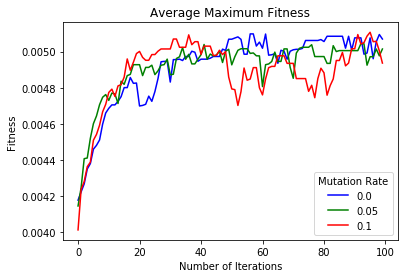

In [148]:
x = []
for i in range(len(avg_0)):
    x.append(i)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(x,avg_0,color='blue',label='0.0')
plt.plot(x,avg_005,color='green',label='0.05')
plt.plot(x,avg_01,color='red',label='0.1')
#plt.plot(x,avg_02,color='orange',label='0.2')
plt.title('Average Maximum Fitness')
plt.ylabel('Fitness')
plt.xlabel('Number of Iterations')
plt.legend(title="Mutation Rate")
fig.savefig('fitness_avg_all.pdf')

In [150]:
# we now do a similar test for the population size

answers = []
for x in range(10):
    sales = salesman(cities,N,iterations=100,trav=10)
    answers.append(sales[1])
array_10 = np.array(answers)

avg_10 = []
for j in range(len(array_10[0])):
    summ = 0
    for i in range(len(array_10)):
        summ = summ + array_10[i][j]
    avg_10.append(summ/10)
    

answers = []
for x in range(10):
    sales = salesman(cities,N,iterations=100,trav=50)
    answers.append(sales[1])
array_50 = np.array(answers)

avg_50 = []
for j in range(len(array_50[0])):
    summ = 0
    for i in range(len(array_50)):
        summ = summ + array_50[i][j]
    avg_50.append(summ/10)


answers = []
for x in range(10):
    sales = salesman(cities,N,iterations=100,trav=100)
    answers.append(sales[1])
array_100 = np.array(answers)

avg_100 = []
for j in range(len(array_100[0])):
    summ = 0
    for i in range(len(array_100)):
        summ = summ + array_100[i][j]
    avg_100.append(summ/10)

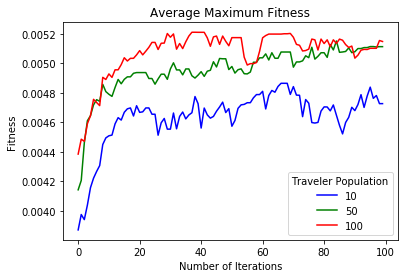

In [151]:
x = []
for i in range(len(avg_10)):
    x.append(i)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(x,avg_10,color='blue',label='10')
plt.plot(x,avg_50,color='green',label='50')
plt.plot(x,avg_100,color='red',label='100')
plt.title('Average Maximum Fitness')
plt.ylabel('Fitness')
plt.xlabel('Number of Iterations')
plt.legend(title="Traveler Population")
fig.savefig('fitness_avgtrav_all.pdf')

## Part 2: Tour of Chicago

Great, this seems to be working! Let's apply it now to a map of Chicago.

In [64]:
import csv

# I used a web plot digitizer to plot some choice chicago neighborhoods as coordinates
# I added this data file to the github repository so this should run
# The first data point is O'Hare, which will be our origin
with open('chicago_data.csv','r') as chicago:
    data = list(csv.reader(chicago)) 
    data = np.array(data)
    data=data.astype(float)
print(data)

result = salesman(data,len(data[:,0]),iterations=1000)[0]
print(result)

[[125.26315789 419.02654867]
 [261.05263158 342.03539823]
 [286.31578947 370.3539823 ]
 [301.05263158 434.07079646]
 [321.05263158 478.31858407]
 [337.89473684 424.33628319]
 [342.10526316 369.46902655]
 [344.21052632 259.73451327]
 [352.63157895 184.51327434]
 [370.52631579 311.0619469 ]
 [376.84210526 286.28318584]
 [405.26315789 206.63716814]
 [427.36842105 165.92920354]
 [456.84210526 139.38053097]]
[0, 2, 3, 4, 5, 6, 9, 10, 8, 12, 13, 11, 7, 1]


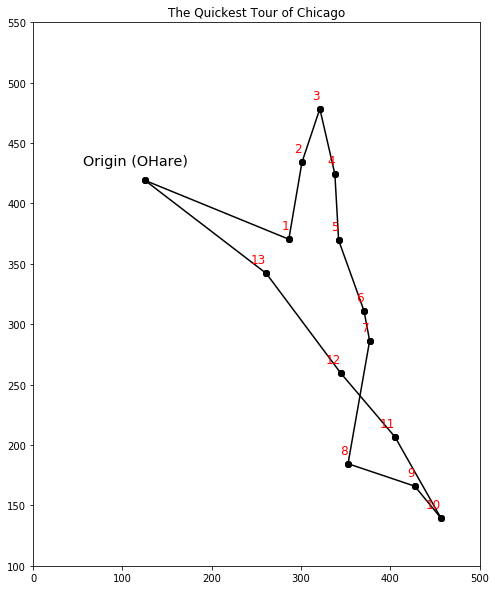

In [66]:
fig = plt.figure(figsize=(8,10))
ax = fig.add_subplot(111)

#Plot the cities
plt.scatter(data[:,0],data[:,1])
plt.title('The Quickest Tour of Chicago')
plt.annotate('Origin (OHare)', (data[0,0],data[0,1]),textcoords="offset points", xytext=(-10,15), ha='center',fontsize='x-large')

#draw lines showing the ideal path!
for i in range(len(result)-1):
    k = result[i]
    kplus = result[i+1]
    plt.plot([data[k,0],data[kplus,0]],[data[k,1],data[kplus,1]],'ko-')
    plt.annotate(i+1,(data[kplus,0],data[kplus,1]),textcoords="offset points", xytext=(0,10), ha='right',fontsize='large',color='red')
k = result[len(result)-1]
kplus = result[0]
plt.plot([data[k,0],data[kplus,0]],[data[k,1],data[kplus,1]],'ko-')
plt.ylim([100,550])
plt.xlim([0,500])

fig.savefig('chicago_tour_trans.png',transparent=True)
plt.show()